In [2]:
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm
#import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [173]:
#dataset containing sales transactions
ConsumerElectronics = pd.read_csv("./ConsumerElectronics.csv")

C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\4254553577.py:2: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ConsumerElectronics = pd.read_csv("./ConsumerElectronics.csv")


In [174]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [175]:
#Set values into a normal format other than the shown Exponential form
pd.set_option('display.float_format', '{:0.2f}'.format)

In [176]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [177]:
ConsumerElectronics.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00
mean,2015.52,6.59,2842444674146622.00,13756277530325592.00,1.02,5.69,4108.31,5.40
std,0.50,3.62,1269134332596903.50,55945981798628056.00,0.25,2.98,8510.92,53.47
min,2015.00,1.00,76331515.00,108016495.00,1.00,0.00,0.00,-1.00
25%,2015.00,3.00,1602588503969575.00,1606725138262300.00,1.00,4.00,799.00,1.00
50%,2016.00,6.00,2611824528743350.00,2619185472741150.00,1.00,6.00,1599.00,2.00
75%,2016.00,10.00,3610613539366250.00,4397705931628400.00,1.00,7.00,3499.00,3.00
max,2016.00,12.00,5395076790260600.00,300037347717704000.00,50.00,1006.00,299999.00,1000.00


In [178]:
# Renaming some of the columns 
ConsumerElectronics.rename(columns={"FSN_ID": "FSN_ID", "Order_date": "Order_date", "Order_id": "Order_id", "Order_item_id": "Order_item_id", "s1_fact.order_payment_type	": "payment_mode", "SLA" : "Procurement_SLA" })

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4402170060025800.00,4402170060025800.00,2200,1,\N,\N,COD,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1402393217090200.00,1402393217090200.00,2098,1,\N,\N,COD,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4403459511294400.00,4403459511294400.00,2098,1,\N,\N,COD,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4403860318235600.00,4403860318235600.00,2200,1,\N,\N,COD,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2


In [179]:
ConsumerElectronics.describe(include='all')

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
count,1648824,1648824,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824,1648824,1648824,1648824.00,1648824,1648824.00,1648824,1648824,1648824,1648824,1648824.00,1648824.00
unique,21219,1155192,NaN,NaN,NaN,NaN,18086.00,NaN,143,171,2,NaN,1253495,12973.00,1,5,14,74,NaN,NaN
top,ACCE6VGHYKYFX4WB,2016-04-27 00:19:27,NaN,NaN,NaN,NaN,999.00,NaN,\N,\N,COD,NaN,,-9031043207091489792.00,CE,EntertainmentSmall,Speaker,LaptopSpeaker,NaN,NaN
freq,37622,294,NaN,NaN,NaN,NaN,23738.00,NaN,1312972,1312971,1191443,NaN,4904,7743.00,1648824,944698,543928,287850,NaN,NaN
mean,NaN,NaN,2015.52,6.59,2842444674146622.00,13756277530325592.00,NaN,1.02,NaN,NaN,NaN,5.69,NaN,NaN,NaN,NaN,NaN,NaN,4108.31,5.40
std,NaN,NaN,0.50,3.62,1269134332596903.50,55945981798628056.00,NaN,0.25,NaN,NaN,NaN,2.98,NaN,NaN,NaN,NaN,NaN,NaN,8510.92,53.47
min,NaN,NaN,2015.00,1.00,76331515.00,108016495.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-1.00
25%,NaN,NaN,2015.00,3.00,1602588503969575.00,1606725138262300.00,NaN,1.00,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,799.00,1.00
50%,NaN,NaN,2016.00,6.00,2611824528743350.00,2619185472741150.00,NaN,1.00,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,1599.00,2.00
75%,NaN,NaN,2016.00,10.00,3610613539366250.00,4397705931628400.00,NaN,1.00,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,3499.00,3.00


In [180]:
pd.value_counts(ConsumerElectronics['gmv'].values, sort=False)

6400      18
6900      83
1990     418
1690     229
1618      10
        ... 
3857       2
3766       2
2686      26
12330      2
3225       2
Length: 18086, dtype: int64

In [181]:
#Convert date format
ConsumerElectronics['order_date_c']=pd.to_datetime(ConsumerElectronics['order_date'])

In [182]:
ConsumerElectronics['order_date'].head()

0    2015-10-17 15:11:54
1    2015-10-19 10:07:22
2    2015-10-20 15:45:56
3    2015-10-14 12:05:15
4    2015-10-17 21:25:03
Name: order_date, dtype: object

In [183]:
ConsumerElectronics['order_date_c'].head()

0   2015-10-17 15:11:54
1   2015-10-19 10:07:22
2   2015-10-20 15:45:56
3   2015-10-14 12:05:15
4   2015-10-17 21:25:03
Name: order_date_c, dtype: datetime64[ns]

In [184]:
#Extract the week number
ConsumerElectronics['week_year']=ConsumerElectronics['order_date_c'].dt.isocalendar().week

In [185]:
ConsumerElectronics['week_year'].head()


0    42
1    43
2    43
3    42
4    42
Name: week_year, dtype: UInt32

In [186]:
ConsumerElectronics['order_date_c'].head()

0   2015-10-17 15:11:54
1   2015-10-19 10:07:22
2   2015-10-20 15:45:56
3   2015-10-14 12:05:15
4   2015-10-17 21:25:03
Name: order_date_c, dtype: datetime64[ns]

In [187]:
#Select data only from week 28 2015 to week 26 2016
ConsumerElectronics = ConsumerElectronics[((ConsumerElectronics.Year ==2016) & (ConsumerElectronics.week_year <=26)) | ((ConsumerElectronics.Year ==2015) & (ConsumerElectronics.week_year >=28))]

In [188]:
#Adding 53 to the week nimber of 2016 so as to sort it easily
ConsumerElectronics['week_year']=np.where((operator.and_(ConsumerElectronics['week_year']<=26, ConsumerElectronics['Year']==2016)),ConsumerElectronics['week_year']+53,ConsumerElectronics['week_year'])

In [189]:
np.sort(ConsumerElectronics['week_year'].unique())

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79], dtype=object)

In [190]:
#MRP

In [191]:
min(ConsumerElectronics['product_mrp'])

0

In [192]:
ConsumerElectronics=ConsumerElectronics[ConsumerElectronics['product_mrp']>0]

In [193]:
min(ConsumerElectronics['product_mrp'])

49

In [194]:
sum(ConsumerElectronics['product_mrp'].isna())

0

In [195]:
#GMV

In [196]:
#set al values of 0 in gmv to 1
ConsumerElectronics.gmv[ConsumerElectronics.gmv==0]=1
ConsumerElectronics.gmv[ConsumerElectronics.gmv==" "]=1

In [197]:
ConsumerElectronics.gmv[ConsumerElectronics.gmv==0]

Series([], Name: gmv, dtype: object)

In [198]:
ConsumerElectronics.shape

(1629389, 22)

In [199]:
#Removing records where items are sold more than MRP - Ex: Bulk to individuals

In [200]:
ConsumerElectronics=ConsumerElectronics[pd.to_numeric(ConsumerElectronics.product_mrp*ConsumerElectronics.units)>=pd.to_numeric(ConsumerElectronics.gmv)]

In [201]:
ConsumerElectronics.shape

(1596124, 22)

In [202]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [203]:
# subset data for one category - GamingAccessory

In [204]:
ConsumerElectronics.rename(columns={"s1_fact.order_payment_type": "payment_method"})

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,payment_method,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4402170060025800.00,4402170060025800.00,2200,1,\N,\N,COD,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-27 19:20:31,39
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1402393217090200.00,1402393217090200.00,2098,1,\N,\N,COD,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-28 01:32:58,40
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4403459511294400.00,4403459511294400.00,2098,1,\N,\N,COD,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 07:07:57,40
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4403860318235600.00,4403860318235600.00,2200,1,\N,\N,COD,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 18:15:45,40


In [205]:
ConsumerElectronics_gaming = ConsumerElectronics[ConsumerElectronics.product_analytic_sub_category == "GamingAccessory"]

In [206]:
ConsumerElectronics_gaming.shape

(195948, 22)

In [207]:
pd.options.mode.chained_assignment = None  

In [208]:
#Forming new variables and formatting

In [209]:
ConsumerElectronics_gaming['gmv']=pd.to_numeric(ConsumerElectronics_gaming['gmv'])
ConsumerElectronics_gaming['list_price']=ConsumerElectronics_gaming['gmv']/ConsumerElectronics_gaming['units']
ConsumerElectronics_gaming['discount_offered']=(ConsumerElectronics_gaming['product_mrp']-ConsumerElectronics_gaming['list_price'])/ConsumerElectronics_gaming['product_mrp']

In [210]:
ConsumerElectronics_gaming [1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year,list_price,discount_offered
1599,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1416985339691600.00,1416985339691600.00,2750.00,1,\N,\N,COD,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-14 22:54:54,42,2750.00,0.31
1600,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1417669228375400.00,1417669228375400.00,2899.00,1,\N,\N,Prepaid,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-15 20:19:38,42,2899.00,0.28
1601,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1419414998353400.00,1419414998353400.00,2609.00,1,\N,\N,Prepaid,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-17 18:21:43,42,2609.00,0.35
1602,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1427167582532600.00,1427167582532600.00,2772.00,1,\N,\N,Prepaid,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-26 17:49:39,44,2772.00,0.31


In [211]:
ConsumerElectronics_gaming['s1_fact.order_payment_type'].value_counts()

COD        147904
Prepaid     48044
Name: s1_fact.order_payment_type, dtype: int64

In [212]:
ConsumerElectronics_gaming['Prepaid_ind'] = np.where(ConsumerElectronics_gaming['s1_fact.order_payment_type']=='Prepaid', 1, 0)

In [213]:
ConsumerElectronics_gaming.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year,list_price,discount_offered,Prepaid_ind
1598,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1408216975064600.00,1408216975064600.00,3075.00,1,\N,\N,COD,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-04 19:24:36,40,3075.00,0.23,0
1599,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1416985339691600.00,1416985339691600.00,2750.00,1,\N,\N,COD,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-14 22:54:54,42,2750.00,0.31,0
1600,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1417669228375400.00,1417669228375400.00,2899.00,1,\N,\N,Prepaid,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-15 20:19:38,42,2899.00,0.28,1
1601,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1419414998353400.00,1419414998353400.00,2609.00,1,\N,\N,Prepaid,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-17 18:21:43,42,2609.00,0.35,1
1602,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1427167582532600.00,1427167582532600.00,2772.00,1,\N,\N,Prepaid,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-26 17:49:39,44,2772.00,0.31,1


In [214]:
#Finding the percentage contribution of perpaid sales as total number of units sold

In [215]:
perc_cal=ConsumerElectronics_gaming.groupby(['week_year']).agg({'Prepaid_ind': ['sum','count']})
perc_cal.columns.values.tolist()

[('Prepaid_ind', 'sum'), ('Prepaid_ind', 'count')]

In [216]:
perc_cal.head()

Prepaid_ind      
                  sum count
week_year                  
28                818  3034
29                693  2780
30                608  2535
31                392  1810
32                  1     5

In [217]:
#Calculating the percentage. Aggregated at week_year level
prepaid_perc=perc_cal['Prepaid_ind','sum'].values/perc_cal['Prepaid_ind','count'].values

In [218]:
prepaid_perc=perc_cal['Prepaid_ind','sum'].values/perc_cal['Prepaid_ind','count'].values

In [219]:
ConsumerElectronics_gaming_agg=ConsumerElectronics_gaming.groupby(['week_year']).agg({'list_price': ['mean'],'gmv':['mean'], 'units':['mean'], 'sla': ['mean'], 'discount_offered': ['mean'], 'product_procurement_sla': ['mean'], 'Year': ['mean'], 'Month': ['mean'] })


In [220]:
ConsumerElectronics_gaming_agg.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month
,mean,mean,mean,mean,mean,mean,mean,mean
week_year,,,,,,,,
28,867.65,902.47,1.06,5.28,0.41,2.98,2015.00,7.00
29,810.79,831.28,1.09,5.20,0.44,2.54,2015.00,7.00
30,1007.33,1038.59,1.04,5.32,0.39,2.39,2015.00,7.00
31,997.04,1042.12,1.05,5.55,0.44,2.95,2015.00,7.00
32,528.80,528.80,1.00,6.40,0.55,1.60,2015.00,8.00


In [221]:
#Creating the key variable 'week_year' for joining with other datasets
# Renaming the columns
ConsumerElectronics_gaming_agg.columns = ['list_price','gmv','units','sla','discount_offered','product_procurement_sla','Year','Month']
# Creating the key variable 'week_year' for joining with other datasets
ConsumerElectronics_gaming_agg['week_year']=ConsumerElectronics_gaming_agg.index
# Rounding off the month
ConsumerElectronics_gaming_agg['Month']=round(ConsumerElectronics_gaming_agg['Month'],0)

In [222]:
ConsumerElectronics_gaming_agg.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year
week_year,,,,,,,,,
28,867.65,902.47,1.06,5.28,0.41,2.98,2015.00,7.00,28
29,810.79,831.28,1.09,5.20,0.44,2.54,2015.00,7.00,29
30,1007.33,1038.59,1.04,5.32,0.39,2.39,2015.00,7.00,30
31,997.04,1042.12,1.05,5.55,0.44,2.95,2015.00,7.00,31
32,528.80,528.80,1.00,6.40,0.55,1.60,2015.00,8.00,32


In [223]:
#Investment Dataset

In [4]:
investment = pd.read_csv('investments_data.csv')

In [5]:
investment.head()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,Radio,Other,nps,Stock_Index
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN,54.6,1177
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN,60.0,1206
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,NaN,NaN,46.9,1101
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,NaN,NaN,44.4,1210
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,NaN,NaN,47.0,1233


In [6]:
columns = investment.columns

In [7]:
investment = investment.loc[:,['year','month','Total_investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'nps', 'Stock_Index']]

In [8]:
investment.head()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,nps,Stock_Index
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,54.6,1177
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,60.0,1206
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,46.9,1101
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,44.4,1210
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,47.0,1233


In [10]:
investment.describe()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,nps,Stock_Index
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2015.500000,6.500000,70.550000,3.700000,2.483333,30.450000,0.666667,16.141667,5.116667,7.591667,49.558333,1159.833333
std,0.522233,3.605551,44.533736,2.688021,3.270205,26.232301,0.944201,8.456892,2.556928,7.953325,4.334944,84.010641
min,2015.000000,1.000000,5.100000,0.000000,0.500000,1.100000,0.000000,0.100000,0.100000,2.500000,44.400000,1015.000000
25%,2015.000000,3.750000,46.775000,1.625000,1.200000,10.625000,0.000000,14.300000,4.450000,4.200000,46.975000,1088.750000
50%,2015.500000,6.500000,65.500000,4.050000,1.400000,24.650000,0.500000,19.000000,6.350000,5.100000,48.150000,1200.000000
75%,2016.000000,9.250000,97.225000,5.250000,2.200000,45.375000,0.825000,22.600000,6.800000,6.375000,50.825000,1223.500000
max,2016.000000,12.000000,170.200000,9.300000,12.600000,84.700000,3.400000,24.400000,7.400000,31.900000,60.000000,1242.000000


In [229]:
investment_sht=investment.loc[:,['Content_marketing','Digital','month','nps','Sponsorship','Stock_Index','Total_investment','TV','year']]

In [230]:
# Renaming the datset for joining
investment_sht=investment_sht.rename(columns={"year": "Year","month":"Month"})

In [231]:
investment_sht.head()

,Content_marketing,Digital,Month,nps,Sponsorship,Stock_Index,Total_investment,TV,Year
0,0.00,2.50,7,54.60,7.40,1177,17.10,0.20,2015
1,0.00,1.30,8,60.00,1.10,1206,5.10,0.00,2015
2,0.60,1.40,9,46.90,62.80,1101,96.30,3.90,2015
3,3.40,12.60,10,44.40,84.70,1210,170.20,6.10,2015
4,0.20,1.30,11,47.00,14.20,1233,51.20,4.20,2015


In [232]:
#Joining investment with the aggregated sales data
ConsumerElectronics_gaming_full=pd.merge(ConsumerElectronics_gaming_agg,investment_sht,on=['Month','Year'])
ConsumerElectronics_gaming_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV
0,867.65,902.47,1.06,5.28,0.41,2.98,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20
1,810.79,831.28,1.09,5.20,0.44,2.54,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20
2,1007.33,1038.59,1.04,5.32,0.39,2.39,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20
3,997.04,1042.12,1.05,5.55,0.44,2.95,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20
4,528.80,528.80,1.00,6.40,0.55,1.60,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00


In [233]:
#Climate Data

In [234]:
climate=pd.read_csv("./Ecom_climate.csv")

In [235]:
climate.head()

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd
0,2015-01-01,2015,1,1,0.00,-8.50,-4.30,22.30,0.00,0.00,0.00,0.00,0.00
1,2015-01-02,2015,1,2,3.00,-3.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00
2,2015-01-03,2015,1,3,2.50,-4.00,-0.80,18.80,0.00,24.00,0.00,24.00,0.00
3,2015-01-04,2015,1,4,2.50,0.00,1.30,16.70,0.00,0.00,1.00,1.00,0.00
4,2015-01-05,2015,1,5,-10.00,-13.50,-11.80,29.80,0.00,0.00,3.00,3.00,1.00


In [236]:
climate['DateTime']=pd.to_datetime(climate['DateTime'])
climate['week_year']=climate['DateTime'].dt.isocalendar().week

In [237]:
climate_bot=climate[operator.and_(climate['week_year']<=26, climate['Year']==2016)]
climate_bot['week_year']=climate_bot['week_year']+53
climate_top=climate[operator.and_(climate['week_year']>=28, climate['Year']==2015)]
climate_bot.head()

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd,week_year
368,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
369,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
370,2016-01-06,2016,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
371,2016-01-07,2016,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
372,2016-01-08,2016,1,8,7.00,-14.00,-3.50,21.50,0.00,9.00,0.00,9.00,0.00,54


In [238]:
#Combining the relevant climatic data and validation
climate=climate_bot.append(climate_top)
climate['week_year'].unique()

C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\1074053485.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate=climate_bot.append(climate_top)


<IntegerArray>
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 52, dtype: UInt32

In [239]:
# Dropping unnecessary variables
climate=climate.loc[:,['week_year','Cool_DegDays','Heat_DegDays','Max_Temp','SnowonGrnd','TotalPrecip','TotalSnow']]
climate_agg=climate.groupby(['week_year']).agg({'Cool_DegDays': ['mean'],'Heat_DegDays': ['mean'],'Max_Temp': ['mean'],'SnowonGrnd': ['mean'],'TotalPrecip': ['mean'],'TotalSnow': ['mean']})

In [240]:
climate_agg.head()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow
,mean,mean,mean,mean,mean,mean
week_year,,,,,,
28,2.38,0.28,24.83,0.00,4.42,0.00
29,5.18,0.00,28.75,0.00,1.40,0.00
30,5.06,0.00,29.75,0.00,0.90,0.00
31,6.57,0.00,31.58,0.00,4.63,0.00
32,3.65,0.00,27.20,0.00,0.28,0.00


In [241]:
#missing imputation for Cold
climate_agg['Cool_DegDays','mean'][climate_agg['Cool_DegDays','mean'].isna()]=0
#missing imputation for Heat
climate_agg['Heat_DegDays','mean'][climate_agg['Heat_DegDays','mean'].isna()]=21

In [242]:
prepaid_perc[:,]

array([0.26961107, 0.24928058, 0.23984221, 0.21657459, 0.2       ,
       0.25      , 0.        , 0.        , 0.21574344, 0.22599195,
       0.23587271, 0.21142433, 0.18130235, 0.18444924, 0.21481481,
       0.18023686, 0.172     , 0.18926678, 0.18382764, 0.1655225 ,
       0.18347667, 0.15546559, 0.17911142, 0.16178483, 0.16236616,
       0.14875283, 0.16278539, 0.17003324, 0.20542852, 0.18517467,
       0.18506961, 0.18305745, 0.18091243, 0.16586538, 0.17249747,
       0.22699387, 0.19770521, 0.30292653, 0.55074149, 0.93572889,
       0.96102598, 0.94135645, 0.572607  , 0.1792882 , 0.16677697,
       0.16666667, 0.21633394, 0.19448244, 0.1870337 , 0.18847309,
       0.18910256, 0.17156016])

In [243]:
#Converting array to dataframe
prepaid_perc2 = pd.DataFrame({'prepaid_perc':prepaid_perc[:,]})
prepaid_perc2.head()

,prepaid_perc
0,0.27
1,0.25
2,0.24
3,0.22
4,0.20


In [244]:
climate_agg.index

Index([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype='UInt32', name='week_year')

In [245]:
#Adding prepaid perc to the climatic information and creating week_year key for merging
climate_agg['week_year']=climate_agg.index
climate_agg.head()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,week_year
,mean,mean,mean,mean,mean,mean,
week_year,,,,,,,
28,2.38,0.28,24.83,0.00,4.42,0.00,28
29,5.18,0.00,28.75,0.00,1.40,0.00,29
30,5.06,0.00,29.75,0.00,0.90,0.00,30
31,6.57,0.00,31.58,0.00,4.63,0.00,31
32,3.65,0.00,27.20,0.00,0.28,0.00,32


In [246]:
climate_agg1 = pd.concat([climate_agg.reset_index(drop=True), prepaid_perc2], axis=1)
climate_agg1.head()

,"(Cool_DegDays, mean)","(Heat_DegDays, mean)","(Max_Temp, mean)","(SnowonGrnd, mean)","(TotalPrecip, mean)","(TotalSnow, mean)","(week_year, )",prepaid_perc
0,2.38,0.28,24.83,0.00,4.42,0.00,28,0.27
1,5.18,0.00,28.75,0.00,1.40,0.00,29,0.25
2,5.06,0.00,29.75,0.00,0.90,0.00,30,0.24
3,6.57,0.00,31.58,0.00,4.63,0.00,31,0.22
4,3.65,0.00,27.20,0.00,0.28,0.00,32,0.20


In [247]:
#Creating data frame with the list of holidays given
holiday_list=pd.DataFrame([["2015-07-18"],
                           ["2015-07-19"],
                           ["2015-08-15"],
                           ["2015-08-16"],
                           ["2015-08-17"],
                           ["2015-08-28"],
                           ["2015-08-29"],
                           ["2015-08-30"],
                           ["2015-10-15"],
                           ["2015-10-16"],
                           ["2015-10-17"],
                           ["2015-11-07"],
                           ["2015-11-08"],
                           ["2015-11-09"],
                           ["2015-11-10"],
                           ["2015-10-11"],
                           ["2015-10-12"],
                           ["2015-11-13"],
                           ["2015-11-14"],
                           ["2015-12-25"],
                           ["2015-12-26"],
                           ["2015-12-27"],
                           ["2015-12-28"],
                           ["2015-12-29"],
                           ["2015-12-30"],
                           ["2016-01-01"],
                           ["2016-01-02"],
                           ["2016-01-03"],
                           ["2016-01-20"],
                           ["2016-01-21"],
                           ["2016-01-22"],
                           ["2016-02-01"],
                           ["2016-02-02"],
                           ["2016-02-20"],
                           ["2016-02-21"],
                           ["2016-02-14"],
                           ["2016-02-15"],
                           ["2016-03-07"],
                           ["2016-03-08"],
                           ["2016-03-09"],
                           ["2016-05-25"],
                           ["2016-05-26"],
                           ["2016-05-27"]], columns=['holiday_day'])

In [248]:
#Creating the holiday flag
holiday_list['holiday_day']=pd.to_datetime(holiday_list['holiday_day'])
holiday_list['week_year']=holiday_list['holiday_day'].dt.isocalendar().week
holiday_list

,holiday_day,week_year
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34
5,2015-08-28,35
6,2015-08-29,35
7,2015-08-30,35
8,2015-10-15,42
9,2015-10-16,42


In [249]:
holiday_list['week_year']=np.where(holiday_list['week_year']<=26,holiday_list['week_year']+53,holiday_list['week_year'])
holiday_list

,holiday_day,week_year
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34
5,2015-08-28,35
6,2015-08-29,35
7,2015-08-30,35
8,2015-10-15,42
9,2015-10-16,42


In [250]:
holiday_df=pd.DataFrame(holiday_list['week_year'].unique(),columns=['week_year'])
holiday_df['holiday_flag']=1
holiday_df.head()

,week_year,holiday_flag
0,29,1
1,33,1
2,34,1
3,35,1
4,42,1


In [251]:
#Creating the pay day flag
pay_list=pd.date_range('2015-07-01','2016-06-30', freq='SMS').strftime("%Y-%m-%d").tolist()
pay_list

['2015-07-01',
 '2015-07-15',
 '2015-08-01',
 '2015-08-15',
 '2015-09-01',
 '2015-09-15',
 '2015-10-01',
 '2015-10-15',
 '2015-11-01',
 '2015-11-15',
 '2015-12-01',
 '2015-12-15',
 '2016-01-01',
 '2016-01-15',
 '2016-02-01',
 '2016-02-15',
 '2016-03-01',
 '2016-03-15',
 '2016-04-01',
 '2016-04-15',
 '2016-05-01',
 '2016-05-15',
 '2016-06-01',
 '2016-06-15']

In [252]:
pay_list=pd.DataFrame(pay_list,columns=['pay_list'])
pay_list['pay_list']=pd.to_datetime(pay_list['pay_list'])
pay_list['week_year']=pay_list['pay_list'].dt.isocalendar().week
pay_list

,pay_list,week_year
0,2015-07-01,27
1,2015-07-15,29
2,2015-08-01,31
3,2015-08-15,33
4,2015-09-01,36
5,2015-09-15,38
6,2015-10-01,40
7,2015-10-15,42
8,2015-11-01,44
9,2015-11-15,46


In [253]:
pay_list['week_year']=np.where(pay_list['week_year']<=26,pay_list['week_year']+53,pay_list['week_year'])
pay_df=pd.DataFrame(pay_list['week_year'].unique(),columns=['week_year'])
pay_df['pay_flag']=1
pay_df

,week_year,pay_flag
0,27,1
1,29,1
2,31,1
3,33,1
4,36,1
5,38,1
6,40,1
7,42,1
8,44,1
9,46,1


In [254]:
climate_agg1.columns.values

array([('Cool_DegDays', 'mean'), ('Heat_DegDays', 'mean'),
       ('Max_Temp', 'mean'), ('SnowonGrnd', 'mean'),
       ('TotalPrecip', 'mean'), ('TotalSnow', 'mean'), ('week_year', ''),
       'prepaid_perc'], dtype=object)

In [255]:
#Renaming the agg climatic data columns
climate_agg1.columns = ['Cool_DegDays', 'Heat_DegDays', 'Max_Temp','SnowonGrnd','TotalPrecip','TotalSnow','week_year','prepaid_perc'] 

In [256]:
#holiday_df,pay_df,climate_agg1,ConsumerElectronics_gaming_full - datasets merge
ConsumerElectronics_gaming_full=pd.merge(ConsumerElectronics_gaming_full,climate_agg1,on=['week_year'],how='left')
ConsumerElectronics_gaming_full=pd.merge(ConsumerElectronics_gaming_full,pay_df,on=['week_year'],how='left')
ConsumerElectronics_gaming_full=pd.merge(ConsumerElectronics_gaming_full,holiday_df,on=['week_year'],how='left')
ConsumerElectronics_gaming_full.shape

(52, 25)

In [257]:
ConsumerElectronics_gaming_full

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
0,867.65,902.47,1.06,5.28,0.41,2.98,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.27,NaN,NaN
1,810.79,831.28,1.09,5.20,0.44,2.54,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.25,1.00,1.00
2,1007.33,1038.59,1.04,5.32,0.39,2.39,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.24,NaN,NaN
3,997.04,1042.12,1.05,5.55,0.44,2.95,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.22,1.00,NaN
4,528.80,528.80,1.00,6.40,0.55,1.60,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,0.20,NaN,NaN
5,1218.75,1218.75,1.00,6.00,0.39,2.50,2015.00,8.00,33,0.00,1.30,60.00,1.10,1206,5.10,0.00,5.95,0.00,29.62,0.00,2.90,0.00,0.25,1.00,1.00
6,311.50,311.50,1.00,2.75,0.46,1.75,2015.00,8.00,34,0.00,1.30,60.00,1.10,1206,5.10,0.00,5.45,0.00,28.42,0.00,5.13,0.00,0.00,NaN,1.00
7,575.75,575.75,1.00,6.00,0.45,3.25,2015.00,8.00,35,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.00,0.75,24.00,0.00,0.00,0.00,0.00,NaN,1.00
8,773.08,796.27,1.05,5.12,0.40,2.64,2015.00,9.00,36,0.60,1.40,46.90,62.80,1101,96.30,3.90,6.46,0.00,30.42,0.00,10.10,0.00,0.22,1.00,NaN
9,927.84,945.11,1.04,5.44,0.39,2.63,2015.00,9.00,37,0.60,1.40,46.90,62.80,1101,96.30,3.90,2.52,1.28,23.50,0.00,0.96,0.00,0.23,NaN,NaN


In [258]:
#VALIDATING

In [259]:
len(ConsumerElectronics_gaming_full)

52

In [260]:
Total_week = 79-28+1
Total_week

52

In [261]:
ConsumerElectronics_gaming_full.describe()


,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
count,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,23.00,16.00
mean,831.28,850.90,1.03,5.64,0.45,2.47,2015.50,6.58,0.66,2.45,49.44,31.69,1154.23,71.77,3.81,1.51,7.46,17.25,0.39,2.90,0.26,0.24,1.00,1.00
std,149.96,153.93,0.02,0.54,0.04,0.31,0.50,3.49,0.88,3.05,4.08,25.08,82.77,42.19,2.64,2.20,7.35,9.61,1.54,3.52,0.74,0.20,0.00,0.00
min,311.50,311.50,1.00,2.75,0.38,1.60,2015.00,1.00,0.00,0.50,44.40,1.10,1015.00,5.10,0.00,0.00,0.00,-2.83,0.00,0.00,0.00,0.00,1.00,1.00
25%,743.50,760.98,1.03,5.48,0.42,2.35,2015.00,3.75,0.00,1.30,46.90,11.70,1052.00,46.77,1.70,0.00,0.21,8.44,0.00,0.30,0.00,0.17,1.00,1.00
50%,828.73,846.43,1.03,5.76,0.45,2.50,2015.50,6.50,0.50,1.40,48.15,25.00,1194.00,74.20,4.05,0.00,5.84,17.43,0.00,1.86,0.00,0.19,1.00,1.00
75%,928.67,945.90,1.04,5.90,0.47,2.58,2016.00,9.25,0.83,2.20,50.50,56.70,1222.00,100.00,5.40,3.07,12.42,26.29,0.00,4.29,0.00,0.22,1.00,1.00
max,1218.75,1218.75,1.09,6.47,0.55,3.46,2016.00,12.00,3.40,12.60,60.00,84.70,1242.00,170.20,9.30,6.57,25.27,31.70,10.33,15.70,3.00,0.96,1.00,1.00


In [262]:
#Missing replacement
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.fillna(0)
ConsumerElectronics_gaming_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
0,867.65,902.47,1.06,5.28,0.41,2.98,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.27,0.00,0.00
1,810.79,831.28,1.09,5.20,0.44,2.54,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.25,1.00,1.00
2,1007.33,1038.59,1.04,5.32,0.39,2.39,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.24,0.00,0.00
3,997.04,1042.12,1.05,5.55,0.44,2.95,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.22,1.00,0.00
4,528.80,528.80,1.00,6.40,0.55,1.60,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,0.20,0.00,0.00


In [263]:
# Define Adstock Rate by creating a function
adstock_rate = 0.50

def adstocked_advertising(adstock_rate, advertising):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1])            
    return adstocked_advertising

In [264]:
#Creating adstock to the media variables as they would carry the adstock effect
ConsumerElectronics_gaming_full['Adstock_Content_marketing'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_gaming_full['Content_marketing'])
ConsumerElectronics_gaming_full['Adstock_Digital'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_gaming_full['Digital'])
ConsumerElectronics_gaming_full['Adstock_TV'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_gaming_full['TV'])

C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\1646936800.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\1646936800.py:9: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')


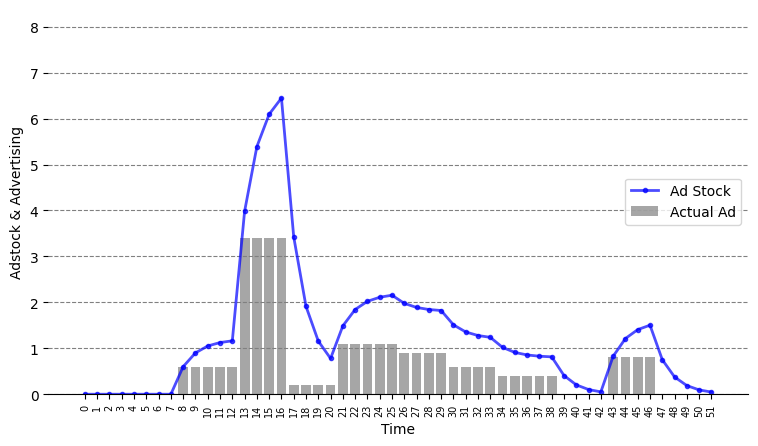

In [265]:
#Adstock rate =.5 
advertising=ConsumerElectronics_gaming_full['Content_marketing']
adstocked_Content_marketing=ConsumerElectronics_gaming_full['Adstock_Content_marketing']
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
ax.set_ylim([0, 1.3*max(adstocked_Content_marketing)])
bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), adstocked_Content_marketing, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 100),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2592421886.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2592421886.py:10: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')


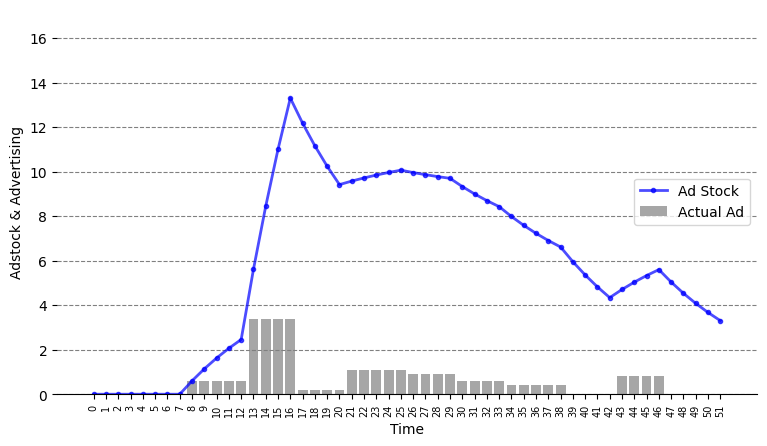

In [266]:
ConsumerElectronics_gaming_full['Adstock_Content_marketing'] = adstocked_advertising(adstock_rate=0.9, advertising=ConsumerElectronics_gaming_full['Content_marketing'])
#Adstock rate =.9
advertising=ConsumerElectronics_gaming_full['Content_marketing']
adstocked_Content_marketing=ConsumerElectronics_gaming_full['Adstock_Content_marketing']
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
ax.set_ylim([0, 1.3*max(adstocked_Content_marketing)])
bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), adstocked_Content_marketing, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 100),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

In [267]:
#Computing Moving average to the sales data to evaluate any important features
ConsumerElectronics_gaming_full['ma2_Units']=ConsumerElectronics_gaming_full['units'].rolling(window=2).mean()
ConsumerElectronics_gaming_full['ma3_Units']=ConsumerElectronics_gaming_full['units'].rolling(window=3).mean()

ConsumerElectronics_gaming_full['ma2_discount_offered']=ConsumerElectronics_gaming_full['discount_offered'].rolling(window=2).mean()
ConsumerElectronics_gaming_full['ma3_discount_offered']=ConsumerElectronics_gaming_full['discount_offered'].rolling(window=3).mean()

In [268]:
#Taking a backup copy of the master dataset
ConsumerElectronics_gaming_full.shape
ConsumerElectronics_gaming_full_bckup=ConsumerElectronics_gaming_full

In [269]:
#Creating the lag variables for nps, holiday, discounts
dis_off=pd.concat([ConsumerElectronics_gaming_full['discount_offered'].shift(-1), ConsumerElectronics_gaming_full['discount_offered'].shift(-2)], axis=1)
dis_off.columns= ['lag1_discount_offered','lag2_discount_offered']

nps_dtl=pd.concat([ConsumerElectronics_gaming_full['nps'].shift(-1), ConsumerElectronics_gaming_full['nps'].shift(-2)], axis=1)
nps_dtl.columns= ['lag1_nps','lag2_nps']

holiday_dtl=pd.concat([ConsumerElectronics_gaming_full['holiday_flag'].shift(-1), ConsumerElectronics_gaming_full['holiday_flag'].shift(-2)], axis=1)
holiday_dtl.columns= ['lag1_holiday','lag2_holiday']

In [270]:
#Adding the lag variables to the dataset
ConsumerElectronics_gaming_full=pd.concat([ConsumerElectronics_gaming_full.reset_index(drop=True),dis_off],axis=1)
ConsumerElectronics_gaming_full=pd.concat([ConsumerElectronics_gaming_full.reset_index(drop=True),nps_dtl],axis=1)
ConsumerElectronics_gaming_full=pd.concat([ConsumerElectronics_gaming_full.reset_index(drop=True),holiday_dtl],axis=1)

In [271]:
ConsumerElectronics_gaming_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
0,867.65,902.47,1.06,5.28,0.41,2.98,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.27,0.00,0.00,0.00,2.50,0.20,NaN,NaN,NaN,NaN,0.44,0.39,54.60,54.60,1.00,0.00
1,810.79,831.28,1.09,5.20,0.44,2.54,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.25,1.00,1.00,0.00,3.75,0.30,1.07,NaN,0.42,NaN,0.39,0.44,54.60,54.60,0.00,0.00
2,1007.33,1038.59,1.04,5.32,0.39,2.39,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.24,0.00,0.00,0.00,4.38,0.35,1.07,1.06,0.41,0.41,0.44,0.55,54.60,60.00,0.00,0.00
3,997.04,1042.12,1.05,5.55,0.44,2.95,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.22,1.00,0.00,0.00,4.69,0.38,1.05,1.06,0.42,0.42,0.55,0.39,60.00,60.00,0.00,1.00
4,528.80,528.80,1.00,6.40,0.55,1.60,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,0.20,0.00,0.00,0.00,3.64,0.19,1.03,1.03,0.50,0.46,0.39,0.46,60.00,60.00,1.00,1.00


In [272]:
#nan treatment in the dataset
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.replace(np.nan, 0)

In [273]:
#Dropping variables with high multi-collinearity
corr = ConsumerElectronics_gaming_full.corr()
corr.style.background_gradient(cmap='coolwarm')

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
list_price,1.000000,0.998576,0.224943,0.299843,-0.604376,0.067462,0.218760,-0.137595,0.251172,-0.178330,-0.138574,-0.066688,0.094180,-0.048317,0.013379,0.059192,0.174431,-0.200669,0.243275,-0.165821,-0.133323,-0.193933,0.450017,0.080952,-0.333977,-0.242900,-0.202041,0.108655,-0.014070,0.009372,-0.193650,-0.125052,-0.153600,-0.182528,-0.117200,-0.080230,-0.283501,-0.021646
gmv,0.998576,1.000000,0.262074,0.289045,-0.609392,0.077281,0.213900,-0.134254,0.246290,-0.169861,-0.125559,-0.082907,0.101076,-0.049988,0.022953,0.068997,0.169866,-0.201166,0.242928,-0.169872,-0.135148,-0.196180,0.452322,0.079254,-0.331992,-0.233323,-0.188496,0.116994,-0.024569,0.000568,-0.211331,-0.137826,-0.145077,-0.187718,-0.116745,-0.082024,-0.285592,-0.030367
units,0.224943,0.262074,1.000000,-0.099869,-0.226757,0.295684,-0.179970,0.133240,-0.179813,0.116535,0.197354,-0.326759,0.223644,-0.087641,0.186842,0.104648,0.040342,-0.117873,0.106790,-0.105159,-0.076137,-0.136568,0.126535,0.124713,0.009487,0.008233,0.185432,0.072718,-0.142452,-0.521412,-0.342044,-0.602124,-0.016869,-0.075988,-0.074513,-0.026611,-0.133402,-0.159470
sla,0.299843,0.289045,-0.099869,1.000000,-0.002219,0.189114,0.104112,-0.057401,0.123864,0.102897,0.009186,-0.241432,0.090869,-0.164521,0.182823,0.231288,-0.362257,0.352846,-0.373091,0.082871,0.012835,0.116968,0.072748,0.185738,-0.276058,0.291123,0.029890,0.280529,0.101073,0.162054,0.162159,0.131140,0.157081,0.190595,-0.018831,0.122323,-0.044043,0.334692
discount_offered,-0.604376,-0.609392,-0.226757,-0.002219,1.000000,-0.125444,0.205849,-0.128677,0.227897,0.079140,-0.035718,-0.003941,-0.149420,0.076554,-0.027009,-0.071149,-0.251229,0.262696,-0.263889,0.117190,0.064961,0.177924,-0.178587,-0.024279,0.250899,0.297078,0.019715,-0.034785,0.118727,0.114172,0.448149,0.311435,0.198888,0.203747,0.090229,0.103612,0.154141,0.109032
product_procurement_sla,0.067462,0.077281,0.295684,0.189114,-0.125444,1.000000,-0.242085,0.053844,-0.358556,0.221742,0.212338,-0.164503,0.158650,-0.232609,0.209339,0.187641,-0.170732,0.168002,-0.222035,0.053539,0.053321,0.036229,-0.025155,0.137162,0.168708,0.051703,0.154332,0.153108,-0.218029,-0.182347,-0.278283,-0.259278,0.060748,0.101003,-0.069354,0.082960,-0.167176,0.021528
Year,0.218760,0.213900,-0.179970,0.104112,0.205849,-0.242085,1.000000,-0.868330,0.866186,-0.256770,-0.378612,-0.019043,-0.314693,0.005162,-0.113492,0.153690,-0.240022,0.369617,-0.274141,0.213617,0.089794,0.218480,0.315803,-0.038720,-0.166667,0.172182,-0.431947,0.241123,0.123043,0.190883,0.250002,0.297906,-0.035663,-0.122571,-0.106731,-0.156214,-0.166667,-0.127343
Month,-0.137595,-0.134254,0.133240,-0.057401,-0.128677,0.053844,-0.868330,1.000000,-0.507728,0.279031,0.380630,-0.196176,0.482566,0.050190,0.243549,-0.058688,0.132712,-0.389038,0.277935,-0.314434,-0.155854,-0.284318,-0.263633,0.041812,0.081638,-0.001911,0.454624,-0.111936,-0.005273,-0.017662,-0.102494,-0.110206,-0.021874,-0.001967,-0.099458,-0.075197,0.045457,-0.020319
week_year,0.251172,0.246290,-0.179813,0.123864,0.227897,-0.358556,0.866186,-0.507728,1.000000,-0.163847,-0.273035,-0.230097,-0.061663,0.056840,0.049113,0.210221,-0.280207,0.251344,-0.197453,0.053252,-0.002086,0.089284,0.285263,-0.029669,-0.210994,0.297391,-0.291579,0.311430,0.220914,0.324847,0.339543,0.414434,-0.100473,-0.230915,-0.301666,-0.365173,-0.255414,-0.230504
Content_marketing,-0.178330,-0.169861,0.116535,0.102897,0.079140,0.221742,-0.256770,0.279031,-0.163847,1.000000,0.897284,-0.610123,0.716364,-0.060315,0.848978,0.361719,-0.370672,0.099724,-0.207481,0.01

In [274]:
#Removing rejected variables based on the profiling/correlation plot
ConsumerElectronics_gaming_full = ConsumerElectronics_gaming_full.drop(columns=['Digital','TV', 'list_price', 'ma2_discount_offered','ma3_discount_offered','ma3_Units','Month','Year'])

In [275]:
### Creating a backup data
ConsumerElectronics_gaming_full_bkp = ConsumerElectronics_gaming_full.copy(deep=True)

In [276]:
ConsumerElectronics_gaming_full = ConsumerElectronics_gaming_full.drop(columns=['week_year', 'units'])

In [277]:
# Get column names first
names = ConsumerElectronics_gaming_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_gaming_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [278]:
#Building a basic linear reg model on the analytical dataset
lreg = LinearRegression()
X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_cv)

In [279]:
mse = np.mean((pred - y_cv)**2)
# calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,sla,-0.25
1,discount_offered,-0.11
2,product_procurement_sla,0.00
3,Content_marketing,0.84
4,nps,-1.25
5,Sponsorship,0.20
6,Stock_Index,-0.12
7,Total_investment,-2.29
8,Cool_DegDays,0.24
9,Heat_DegDays,-0.10


In [280]:
lreg.score(x_cv,y_cv)

-10.662018997403118

In [281]:
#Alternate way of computing all the model statistics easily using sm.OLS
model = sm.OLS(y_train,x_train)
results = model.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.615
Method:                 Least Squares   F-statistic:                              3.308
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                      0.0166
Time:                        23:35:27   Log-Likelihood:                         -13.384
No. Observations:                  39   AIC:                                      80.77
Df Residuals:                      12   BIC:                                      125.7
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [282]:
predictions = results.predict(x_cv)
predictions

43    0.96
31   -1.25
17    0.67
47   -0.24
21   -0.74
5    -0.86
33   -2.17
50   -1.13
30   -1.16
16   -1.35
42    1.01
39    1.27
48    0.50
dtype: float64

In [283]:
#Initial RMSE
math.sqrt(np.mean(np.square((predictions-y_cv))))

1.2344288821148588

In [284]:
#handling multicollinearity
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(lm, step = 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True False False  True  True False False  True False False  True False
  True False False False False  True False  True False  True  True  True
  True False  True]
[1 3 3 1 1 2 3 1 2 3 1 3 1 2 3 3 3 1 2 1 3 1 1 1 1 3 1]


In [285]:
x_rfe = x_train[x_train.columns[rfe.support_]]
model_rfe = sm.OLS(y_train,x_rfe)
results_rfe = model_rfe.fit()
results_rfe.params
print(results_rfe.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              8.059
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    3.83e-06
Time:                        23:35:27   Log-Likelihood:                         -23.485
No. Observations:                  39   AIC:                                      72.97
Df Residuals:                      26   BIC:                                      94.60
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [286]:
#Stepwise variable elimination method for linear regression with in and out p-value thresholds implementation
def stepwise_selection(X, y, 
                       #initial_list=['SLA','Adstock_Content_marketing','Adstock_Digital','Adstock_TV'], 
                       initial_list = ['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 
                                       'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 
                                       'Max_Temp', 'SnowonGrnd', 'TotalPrecip', 'TotalSnow', 'prepaid_perc', 'pay_flag',
                                       'holiday_flag', 'Adstock_Content_marketing', 'Adstock_Digital', 'Adstock_TV',
                                       'ma2_Units', 'lag1_discount_offered', 'lag2_discount_offered', 'lag1_nps',
                                       'lag2_nps', 'lag1_holiday', 'lag2_holiday'],
                       threshold_in=0.001, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            del included[worst_feature]
            #included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [287]:
#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop                              2 with p-value 0.990943
Drop                              8 with p-value 0.829129
Drop                             13 with p-value 0.824043
Drop                              4 with p-value 0.704322

C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici


Drop                             12 with p-value 0.608008
Drop                             20 with p-value 0.631669
Drop                             13 with p-value 0.434821
Drop                              1 with p-value 0.423435
Drop                             15 with p-value 0.386417


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                             10 with p-value 0.286739
Drop                              3 with p-value 0.380786
Drop                              6 with p-value 0.128647


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              7 with p-value 0.131583
resulting features:
['sla', 'Content_marketing', 'nps', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'TotalPrecip', 'Adstock_Content_marketing', 'Adstock_TV', 'ma2_Units', 'lag1_discount_offered', 'lag1_nps', 'lag2_nps', 'lag2_holiday']


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [288]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,[ 'discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']]

In [289]:
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.428
Method:                 Least Squares   F-statistic:                              4.646
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    0.000835
Time:                        23:35:28   Log-Likelihood:                         -39.618
No. Observations:                  39   AIC:                                      95.24
Df Residuals:                      31   BIC:                                      108.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [290]:
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']]
#results.predict(x_cv2)

In [291]:
#RMSE
math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))

0.7210145990016867

In [292]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

0.519862051973563

In [293]:
#Koyck Model (Lag 1 of GMV)
ConsumerElectronics_gaming_full['GMV_1']=ConsumerElectronics_gaming_full['gmv'].shift(-1)
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.fillna(0)

# Get column names first
names = ConsumerElectronics_gaming_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_gaming_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop                             13 with p-value 0.996379
Drop                             16 with p-value 0.987331
Drop                             10 with p-value 0.860884
Drop                             10 with p-value 0.662223
Drop                             22 with p-value 0.626833


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                              5 with p-value 0.356756
Drop                              1 with p-value 0.400866
Drop                             11 with p-value 0.27156
Drop                              4 with p-value 0.355903


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['sla', 'product_procurement_sla', 'Content_marketing', 'nps', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'TotalPrecip', 'prepaid_perc', 'pay_flag', 'Adstock_Digital', 'Adstock_TV', 'ma2_Units', 'lag1_discount_offered', 'lag2_discount_offered', 'lag1_nps', 'lag2_nps', 'lag1_holiday']


In [295]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['sla', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_holiday']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['sla', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_holiday']]
#results.predict(x_cv2)

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.721
Method:                 Least Squares   F-statistic:                              8.768
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    1.71e-06
Time:                        23:36:10   Log-Likelihood:                         -21.746
No. Observations:                  39   AIC:                                      69.49
Df Residuals:                      26   BIC:                                      91.12
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [297]:
#Distributed Lag Models
ConsumerElectronics_gaming_full['GMV_1']=ConsumerElectronics_gaming_full['gmv'].shift(-1)
ConsumerElectronics_gaming_full['GMV_2']=ConsumerElectronics_gaming_full['gmv'].shift(-2)
ConsumerElectronics_gaming_full['GMV_3']=ConsumerElectronics_gaming_full['gmv'].shift(-3)
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.fillna(0)

# Get column names first
names = ConsumerElectronics_gaming_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_gaming_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                             10 with p-value 0.97931
Drop                             15 with p-value 0.949577
Drop                             17 with p-value 0.945683
Drop                             15 with p-value 0.963368
Drop                             20 with p-value 0.822476
Drop                             18 with p-value 0.92542


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                             20 with p-value 0.755316
Drop                             10 with p-value 0.628266
Drop                             15 with p-value 0.597062
Drop                              3 with p-value 0.596903


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                              6 with p-value 0.606678
Drop                             15 with p-value 0.52598
Drop                             12 with p-value 0.220768
Drop                              2 with p-value 0.227462
Drop                             10 with p-value 0.202422
resulting features:
['sla', 'discount_offered', 'nps', 'Sponsorship', 'Stock_Index', 'Cool_DegDays', 'Heat_DegDays', 'TotalPrecip', 'TotalSnow', 'prepaid_perc', 'lag1_discount_offered', 'lag1_nps']


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [300]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing', 'Adstock_TV', 'lag1_discount_offered', 'lag1_nps','GMV_1']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing', 'Adstock_TV', 'lag1_discount_offered', 'lag1_nps','GMV_1']]
results.predict(x_cv2)


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              6.555
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    2.58e-05
Time:                        23:37:57   Log-Likelihood:                         -21.786
No. Observations:                  39   AIC:                                      71.57
Df Residuals:                      25   BIC:                                      94.86
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

14   -2.00
39    0.92
35   -0.38
37    0.22
18    0.40
34   -0.04
40    1.53
48    0.28
32   -0.89
5     1.26
11    0.73
7     0.27
10    0.92
dtype: float64

In [301]:
#RMSE
rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

0.848807668976698

In [302]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

0.7204744589136557

In [303]:
#Exponential/Multiplicative Models
ConsumerElectronics_gaming_full=np.log(ConsumerElectronics_gaming_full)
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.fillna(0)
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.replace([np.inf, -np.inf], 0)

# Get column names first
names = ConsumerElectronics_gaming_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_gaming_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

x_train, x_cv, y_train, y_cv = train_test_split(X,ConsumerElectronics_gaming_full.gmv)

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [304]:
#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                              2 with p-value 0.933807
Drop                             23 with p-value 0.782849
Drop                              4 with p-value 0.638788
Drop                              0 with p-value 0.64847
Drop                             10 with p-value 0.553017
Drop                              3 with p-value 0.522766
Drop                             10 with p-value 0.924848
Drop                             10 with p-value 0.486981
Drop                              4 with p-value 0.433287


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                              6 with p-value 0.190321
Drop                              5 with p-value 0.330268
Drop                              1 with p-value 0.382872
Drop                              8 with p-value 0.280448


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                             10 with p-value 0.278755
Drop                             10 with p-value 0.265348
Drop                              4 with p-value 0.206525


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              4 with p-value 0.245054
Drop                              7 with p-value 0.171705


C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8588\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['discount_offered', 'nps', 'Total_investment', 'Heat_DegDays', 'Adstock_Content_marketing', 'Adstock_Digital', 'ma2_Units', 'lag1_holiday', 'lag2_holiday']


In [305]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'Adstock_Digital', 'Adstock_TV', 'lag1_holiday']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'Adstock_Digital', 'Adstock_TV', 'lag1_holiday']]
results.predict(x_cv2)


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.090
Model:                            OLS   Adj. R-squared (uncentered):             -0.183
Method:                 Least Squares   F-statistic:                             0.3299
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                       0.958
Time:                        23:39:15   Log-Likelihood:                         -127.92
No. Observations:                  39   AIC:                                      273.8
Df Residuals:                      30   BIC:                                      288.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


6    -4.65
43    2.29
5    -4.44
33   -6.82
11    3.36
22    1.19
3    -2.79
4    -6.65
10    3.25
31   -6.46
13    2.67
17   -1.51
39   -2.68
dtype: float64

In [306]:
#RMSE
rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

9.21909778349605

In [307]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

84.99176394166177

<AxesSubplot: xlabel='gmv', ylabel='discount_offered'>

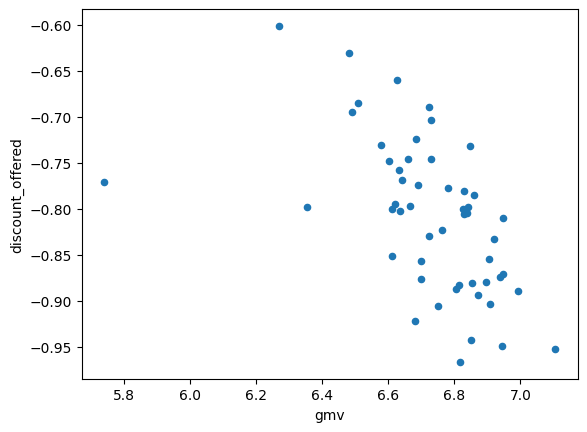

In [308]:
ConsumerElectronics_gaming_full.plot.scatter('gmv','discount_offered')

<AxesSubplot: xlabel='gmv', ylabel='prepaid_perc'>

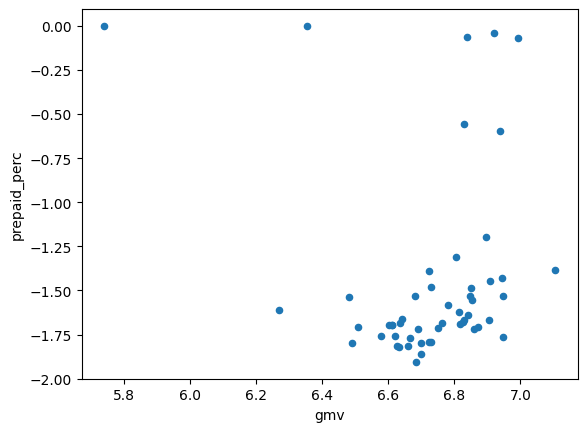

In [309]:
ConsumerElectronics_gaming_full.plot.scatter('gmv','prepaid_perc')

<AxesSubplot: xlabel='gmv', ylabel='sla'>

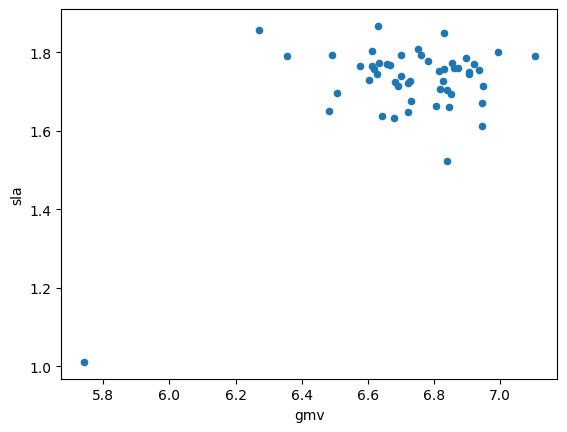

In [310]:
ConsumerElectronics_gaming_full.plot.scatter('gmv','sla')

<AxesSubplot: xlabel='gmv', ylabel='Adstock_Content_marketing'>

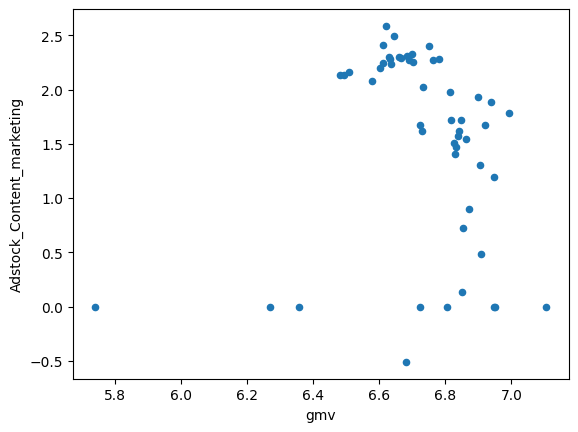

In [311]:
ConsumerElectronics_gaming_full.plot.scatter('gmv','Adstock_Content_marketing')

In [312]:
#Outlier Treatments creating function for identifing lower and upper range
%matplotlib inline
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [313]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_gaming_full.Adstock_Content_marketing)
lowerbound,upperbound

(-0.5898680551402935, 3.973750437213721)

In [314]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_gaming_full.discount_offered)
lowerbound,upperbound

(-1.0595863359346094, -0.5733392703905507)

In [316]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_gaming_full.sla)
lowerbound,upperbound

(1.5910709523052624, 1.8849499369879341)

In [317]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_gaming_full.prepaid_perc)
lowerbound,upperbound

(-2.113023994895217, -1.0893695428484973)

In [318]:
#Range identification and manually deciding the cut off
lower_range=0.09
upper_range=0.6
ConsumerElectronics_gaming_full.prepaid_perc[(ConsumerElectronics_gaming_full.prepaid_perc < lower_range)|(ConsumerElectronics_gaming_full.prepaid_perc > upper_range)]

0    -1.31
1    -1.39
2    -1.43
3    -1.53
4    -1.61
5    -1.39
6     0.00
7     0.00
8    -1.53
9    -1.49
10   -1.44
11   -1.55
12   -1.71
13   -1.69
14   -1.54
15   -1.71
16   -1.76
17   -1.66
18   -1.69
19   -1.80
20   -1.70
21   -1.86
22   -1.72
23   -1.82
24   -1.82
25   -1.91
26   -1.82
27   -1.77
28   -1.58
29   -1.69
30   -1.69
31   -1.70
32   -1.71
33   -1.80
34   -1.76
35   -1.48
36   -1.62
37   -1.19
38   -0.60
39   -0.07
40   -0.04
41   -0.06
42   -0.56
43   -1.72
44   -1.79
45   -1.79
46   -1.53
47   -1.64
48   -1.68
49   -1.67
50   -1.67
51   -1.76
Name: prepaid_perc, dtype: float64

In [319]:
#outlier Treatment
ConsumerElectronics_gaming_full.prepaid_perc[(ConsumerElectronics_gaming_full.prepaid_perc < lower_range) ]=lower_range
ConsumerElectronics_gaming_full.prepaid_perc[(ConsumerElectronics_gaming_full.prepaid_perc > upper_range)]=upper_range

In [320]:
#post Treatment
ConsumerElectronics_gaming_full.prepaid_perc[(ConsumerElectronics_gaming_full.prepaid_perc < lower_range)|(ConsumerElectronics_gaming_full.prepaid_perc > upper_range)]

Series([], Name: prepaid_perc, dtype: float64)

In [321]:
#Regularization implementation - advanced modeling
## training the model on ridge reg
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)
mse = np.mean((pred - y_cv)**2)
mse

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.11140042163995592

In [322]:
ridgeReg.coef_

array([-0.01769415, -0.0695723 , -0.0368271 ,  0.00943882,  0.02684982,
        0.01117298, -0.02492975,  0.02343624, -0.01632472, -0.07188053,
       -0.01386711, -0.01137151,  0.00360462, -0.00068693,  0.02591821,
        0.        ,  0.        ,  0.03204409, -0.04995434,  0.04275161,
        0.03077644,  0.01195111,  0.02344022,  0.00160863,  0.01220941,
        0.        ,  0.        ,  0.00805959, -0.01005142,  0.00412789])

In [323]:
#training model using lasso reg
lassoReg = Lasso(alpha=.05, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)

# calculating mse
mse = np.mean((pred - y_cv)**2)
mse
lassoReg.score(x_cv,y_cv)

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


-0.023297560840421117

In [324]:
lassoReg.coef_

array([-0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,
       -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,
        0., -0., -0., -0.])

In [325]:
#traning the model on elastic net reg
ENreg = ElasticNet(alpha=.1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
pred_cv = ENreg.predict(x_cv)

#calculating mse
mse = np.mean((pred - y_cv)**2)
mse

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


0.12408942792356806

In [326]:
ENreg.coef_

array([-0.        , -0.0177412 , -0.01132377, -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ])